In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/unsupervised')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [15]:
from sklearn.datasets import load_iris
iris_raw_data=load_iris()
X=pd.DataFrame(iris_raw_data.data)
X.columns=iris_raw_data.feature_names

print(" ",type(iris_raw_data)," ==> ", type(X))

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_scaled=std.fit_transform(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_scaled_pca=pca.fit_transform(X_scaled)

print(" ", type(X_scaled_pca))

xdf = pd.DataFrame(data=X_scaled_pca)
xdf.head(3)


  <class 'sklearn.utils._bunch.Bunch'>  ==>  <class 'pandas.core.frame.DataFrame'>
  <class 'numpy.ndarray'>


,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908


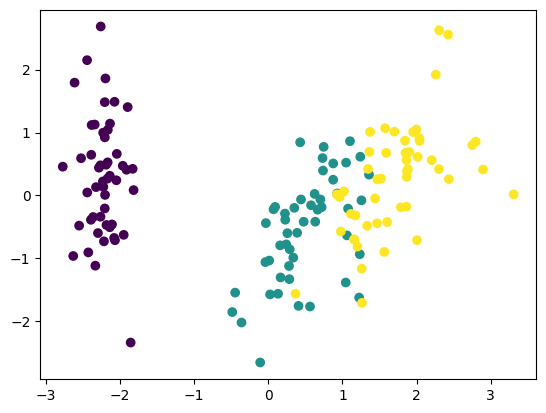

In [17]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=iris_raw_data.target)

In [21]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.1)
clf.fit(xdf)
predictions = clf.predict(xdf)

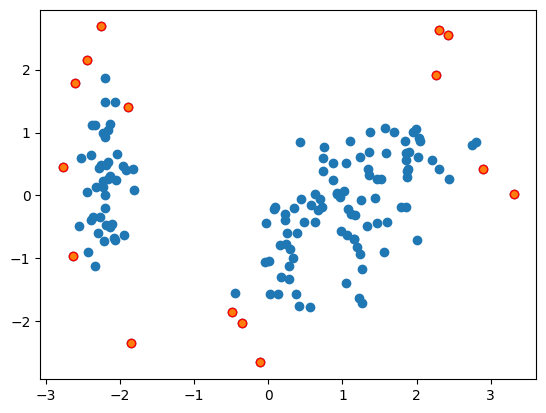

In [25]:
index = np.where(predictions < 0)
plt.scatter(xdf.iloc[:,0], xdf.iloc[:,1])
plt.scatter(X_scaled_pca[index,0], X_scaled_pca[index,1], edgecolors="r")

In [31]:

# --- 1. Data Preparation and PCA ---
# Load Iris dataset
iris_raw_data = load_iris()
X = pd.DataFrame(iris_raw_data.data, columns=iris_raw_data.feature_names)

# Standardize the data
std = StandardScaler()
X_scaled = std.fit_transform(X)

# Reduce dimensions to 2 using PCA for easy visualization
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)
xdf = pd.DataFrame(data=X_scaled_pca, columns=['Principal Component 1', 'Principal Component 2'])

In [32]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # Contamination is the expected fraction of outliers

# Fit the model and get outlier scores.
# The `fit_predict` method returns -1 for outliers and 1 for inliers.
# The `negative_outlier_factor_` attribute provides the scores.
y_pred = lof.fit_predict(xdf)
negative_lof_scores = lof.negative_outlier_factor_
# The LOF scores are negative. We can negate them to make "outlierness" a positive value
# This makes it easier to understand that a larger score means more of an outlier.
lof_scores = -1 * negative_lof_scores

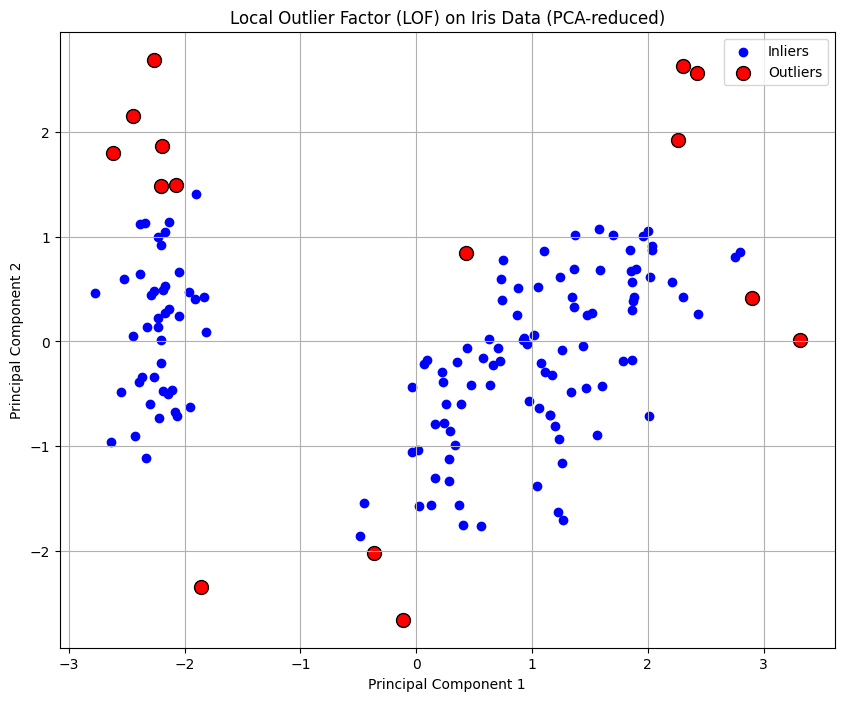

In [33]:
# --- 3. Visualize the Results ---
# Create the scatter plot
plt.figure(figsize=(10, 8))

# Get the indices of the inliers (y_pred == 1) and outliers (y_pred == -1)
inlier_mask = (y_pred == 1)
outlier_mask = (y_pred == -1)

# Plot the inliers in a normal color (e.g., blue)
plt.scatter(xdf.loc[inlier_mask, 'Principal Component 1'],
            xdf.loc[inlier_mask, 'Principal Component 2'],
            c='b', label='Inliers')

# Plot the outliers in a different color (e.g., red)
plt.scatter(xdf.loc[outlier_mask, 'Principal Component 1'],
            xdf.loc[outlier_mask, 'Principal Component 2'],
            c='r', s=100, label='Outliers', edgecolor='k')

# Add a title and labels
plt.title("Local Outlier Factor (LOF) on Iris Data (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()